__BUILDING A RECOMMENDATION SYSTEM USING COSINE SIMILARITY__

__INTRODUCTION:__
__This dataset is gotten from kaggle and it contains 40403 movies with 19 attributes(Filmtvid, title, year, genre, duration, country, actors, directors, avgerage vote, critics vote, public vote, total votes, describtion, notes, humor, rhythm, effort, tension, erotism)__

__To begin I will import our libraries and read my dataset, perform EDA, Feature extraction, Text Preprocessing, apply a vectorizer, build my recommendation system and also test the recommendation system__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("filmtv_movies - ENG.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40303 entries, 0 to 40302
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   filmtv_id     40303 non-null  int64  
 1   title         40303 non-null  object 
 2   year          40303 non-null  int64  
 3   genre         40208 non-null  object 
 4   duration      40303 non-null  int64  
 5   country       40292 non-null  object 
 6   directors     40270 non-null  object 
 7   actors        38251 non-null  object 
 8   avg_vote      40303 non-null  float64
 9   critics_vote  35703 non-null  float64
 10  public_vote   39829 non-null  float64
 11  total_votes   40303 non-null  int64  
 12  description   38848 non-null  object 
 13  notes         18456 non-null  object 
 14  humor         40303 non-null  int64  
 15  rhythm        40303 non-null  int64  
 16  effort        40303 non-null  int64  
 17  tension       40303 non-null  int64  
 18  erotism       40303 non-nu

In [4]:
df.duplicated().sum()

0

In [5]:
df.isna().sum()

filmtv_id           0
title               0
year                0
genre              95
duration            0
country            11
directors          33
actors           2052
avg_vote            0
critics_vote     4600
public_vote       474
total_votes         0
description      1455
notes           21847
humor               0
rhythm              0
effort              0
tension             0
erotism             0
dtype: int64

In [6]:
df

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,description,notes,humor,rhythm,effort,tension,erotism
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,8.00,7.0,22,"With two protruding front teeth, a slightly sl...","These are many small independent stories, whic...",3,3,0,0,0
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,"Samantha, not yet eighteen, leaves the comfort...","Luigi Perelli, the director of the ""Piovra"", o...",0,2,0,2,0
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,6.00,5.0,9,"In the Australia of the pioneers, a boy and a ...","""Ecological"" story with a happy ending, not wi...",1,2,1,0,0
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,Five boys from Baltimore have a habit of meeti...,A cast of will be famous for Levinson's direct...,2,2,0,1,2
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,15,"With a stratagem, the penniless and somewhat p...",Taken from the play by Armando Curcio that the...,3,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40298,221040,Louis C.K.: Sorry,2021,Comedy,63,United States,Louis C.K.,Louis C.K.,6.0,NaN,6.0,1,Show recorded at the Madison Square Garden in ...,NaN,0,0,0,0,0
40299,221041,"Me, Natalie",1969,Comedy,111,United States,Fred Coe,"Patty Duke, James Farentino, Martin Balsam, Al...",8.0,NaN,8.0,1,"Brooklyn. Natalie Miller (Patty Duke), a girl ...",NaN,0,0,0,0,0
40300,221059,Il nero,1967,Drama,107,Italy,Giovanni Vento,"Joy Nwosu, Alessandra Dal Sasso, Andrea Checch...",6.0,6.00,NaN,1,"The hopes, the illusions, the daily vicissitud...",NaN,0,0,0,0,0
40301,221061,Operatsiya 'Y' i drugie priklyucheniya Shurika,1965,Comedy,95,Soviet Union,Leonid Gaidai,"Aleksandr Demyanenko, Mikhail Pugovkin, Alekse...",6.0,6.00,NaN,1,"Three episodes starring the excerpt Shurik, a ...",NaN,0,0,0,0,0


In [7]:
df=df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17073 entries, 1 to 40271
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   filmtv_id     17073 non-null  int64  
 1   title         17073 non-null  object 
 2   year          17073 non-null  int64  
 3   genre         17073 non-null  object 
 4   duration      17073 non-null  int64  
 5   country       17073 non-null  object 
 6   directors     17073 non-null  object 
 7   actors        17073 non-null  object 
 8   avg_vote      17073 non-null  float64
 9   critics_vote  17073 non-null  float64
 10  public_vote   17073 non-null  float64
 11  total_votes   17073 non-null  int64  
 12  description   17073 non-null  object 
 13  notes         17073 non-null  object 
 14  humor         17073 non-null  int64  
 15  rhythm        17073 non-null  int64  
 16  effort        17073 non-null  int64  
 17  tension       17073 non-null  int64  
 18  erotism       17073 non-nu

In [9]:
df['genre'].unique()

array(['Drama', 'Romantic', 'Comedy', 'Spy', 'Crime', 'Thriller',
       'Documentary', 'Horror', 'Action', 'Adventure', 'Western',
       'Biography', 'Musical', 'Fantasy', 'War', 'Grotesque', 'Gangster',
       'Animation', 'Mélo', 'Mythology', 'History', 'Noir', 'Super-hero',
       'Biblical', 'Sport', 'Sperimental'], dtype=object)

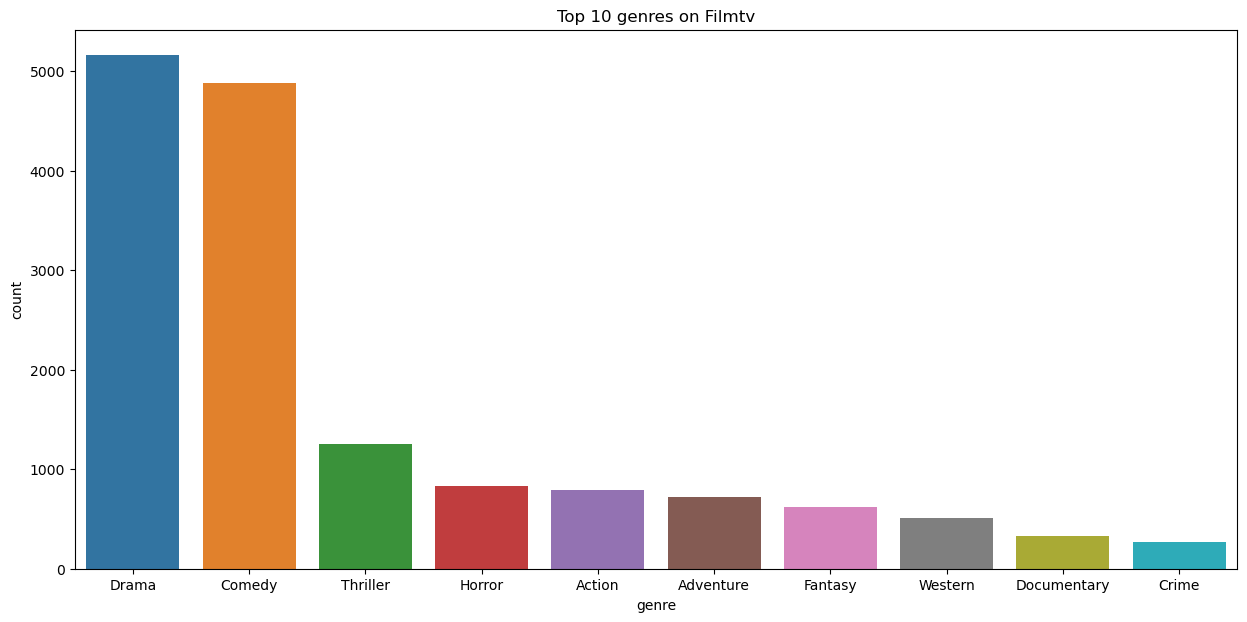

In [10]:
#Visualizing the top 10 movies genre on filmTV
plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='genre', order = df.genre.value_counts().head(10).index)
plt.title('Top 10 genres on Filmtv');

In [11]:
#total votes across all genre 
df.groupby('genre')['total_votes'].count()

genre
Action          795
Adventure       722
Animation        31
Biblical         13
Biography       250
Comedy         4883
Crime           265
Documentary     325
Drama          5159
Fantasy         621
Gangster         41
Grotesque       149
History          60
Horror          832
Musical         226
Mythology        44
Mélo             77
Noir            161
Romantic        181
Sperimental      55
Sport             3
Spy             153
Super-hero       51
Thriller       1252
War             218
Western         506
Name: total_votes, dtype: int64

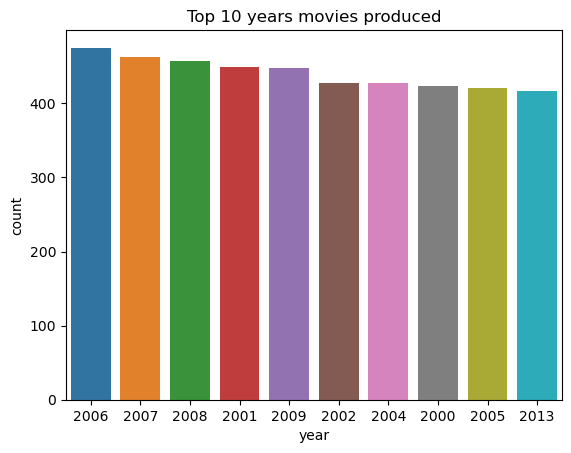

In [12]:
#Top 10 years with the highest films produced
sns.countplot(data=df, x='year', order = df.year.value_counts().head(10).index)
plt.title('Top 10 years movies produced');

Text(0.5, 1.0, 'Top 5 countries where movies are produced')

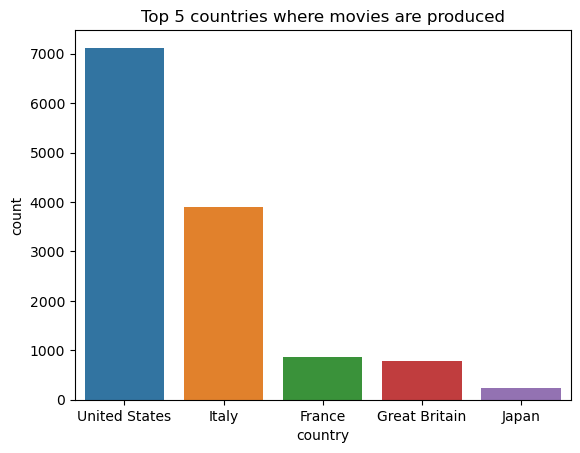

In [41]:
sns.countplot(data=df, x='country', order = df.country.value_counts().head(5).index)
plt.title('Top 5 countries where movies are produced')

__Feature Engineering__

In [13]:
df['text']= df['title'] + " " + df['genre'] + " " + df['country'] + " " + df['directors'] + " " + df['actors'] + " " + df['description'] + " " + df['notes']

C:\Users\EliteBook\AppData\Local\Temp\ipykernel_2360\3560559981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text']= df['title'] + " " + df['genre'] + " " + df['country'] + " " + df['directors'] + " " + df['actors'] + " " + df['description'] + " " + df['notes']


In [14]:
df.head()

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,description,notes,humor,rhythm,effort,tension,erotism,text
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,"Samantha, not yet eighteen, leaves the comfort...","Luigi Perelli, the director of the ""Piovra"", o...",0,2,0,2,0,18 anni tra una settimana Drama Italy Luigi Pe...
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,6.00,5.0,9,"In the Australia of the pioneers, a boy and a ...","""Ecological"" story with a happy ending, not wi...",1,2,1,0,0,Ride a Wild Pony Romantic United States Don Ch...
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,Five boys from Baltimore have a habit of meeti...,A cast of will be famous for Levinson's direct...,2,2,0,1,2,Diner Comedy United States Barry Levinson Mick...
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,15,"With a stratagem, the penniless and somewhat p...",Taken from the play by Armando Curcio that the...,3,1,1,0,0,A che servono questi quattrini? Comedy Italy E...
5,21,The Uranian Conspiracy,1978,Spy,117,"Italy, Germany, Israel","Gianfranco Baldanello, Menahem Golan","Fabio Testi, Janet Agren, Assaf Dayan, Siegfri...",4.8,3.50,6.0,3,Two Israeli secret agents discover that traffi...,"Action and chases for half of Europe, espionag...",1,2,0,2,0,"The Uranian Conspiracy Spy Italy, Germany, Isr..."


In [15]:
film=df
film.head()

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,description,notes,humor,rhythm,effort,tension,erotism,text
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,"Samantha, not yet eighteen, leaves the comfort...","Luigi Perelli, the director of the ""Piovra"", o...",0,2,0,2,0,18 anni tra una settimana Drama Italy Luigi Pe...
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,6.00,5.0,9,"In the Australia of the pioneers, a boy and a ...","""Ecological"" story with a happy ending, not wi...",1,2,1,0,0,Ride a Wild Pony Romantic United States Don Ch...
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,Five boys from Baltimore have a habit of meeti...,A cast of will be famous for Levinson's direct...,2,2,0,1,2,Diner Comedy United States Barry Levinson Mick...
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,15,"With a stratagem, the penniless and somewhat p...",Taken from the play by Armando Curcio that the...,3,1,1,0,0,A che servono questi quattrini? Comedy Italy E...
5,21,The Uranian Conspiracy,1978,Spy,117,"Italy, Germany, Israel","Gianfranco Baldanello, Menahem Golan","Fabio Testi, Janet Agren, Assaf Dayan, Siegfri...",4.8,3.50,6.0,3,Two Israeli secret agents discover that traffi...,"Action and chases for half of Europe, espionag...",1,2,0,2,0,"The Uranian Conspiracy Spy Italy, Germany, Isr..."


In [16]:
film['ids']=[i for i in range(0, film.shape[0])] #creating an id column

C:\Users\EliteBook\AppData\Local\Temp\ipykernel_2360\3385182886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  film['ids']=[i for i in range(0, film.shape[0])] #creating an id column


In [17]:
film.head()

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,...,total_votes,description,notes,humor,rhythm,effort,tension,erotism,text,ids
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,...,4,"Samantha, not yet eighteen, leaves the comfort...","Luigi Perelli, the director of the ""Piovra"", o...",0,2,0,2,0,18 anni tra una settimana Drama Italy Luigi Pe...,0
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,6.00,...,9,"In the Australia of the pioneers, a boy and a ...","""Ecological"" story with a happy ending, not wi...",1,2,1,0,0,Ride a Wild Pony Romantic United States Don Ch...,1
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,...,18,Five boys from Baltimore have a habit of meeti...,A cast of will be famous for Levinson's direct...,2,2,0,1,2,Diner Comedy United States Barry Levinson Mick...,2
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,...,15,"With a stratagem, the penniless and somewhat p...",Taken from the play by Armando Curcio that the...,3,1,1,0,0,A che servono questi quattrini? Comedy Italy E...,3
5,21,The Uranian Conspiracy,1978,Spy,117,"Italy, Germany, Israel","Gianfranco Baldanello, Menahem Golan","Fabio Testi, Janet Agren, Assaf Dayan, Siegfri...",4.8,3.50,...,3,Two Israeli secret agents discover that traffi...,"Action and chases for half of Europe, espionag...",1,2,0,2,0,"The Uranian Conspiracy Spy Italy, Germany, Isr...",4


In [18]:
#Text preprocessing 
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

In [19]:
stopwords = nltk.corpus.stopwords.words('english')

In [20]:
lemmatizer = WordNetLemmatizer()

In [21]:
def clean(text):
    text = re.sub("[^A-Za-z1-9 ]", "", text)
    text= text.lower()
    tokens = word_tokenize(text)
    clean_list = []
    for token in tokens:
        clean_list.append(lemmatizer.lemmatize(token))
    return " ".join(clean_list)

In [22]:
film.text = film.text.apply(clean) #applying our clean function

C:\Users\EliteBook\AppData\Local\Temp\ipykernel_2360\1928159693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  film.text = film.text.apply(clean) #applying our clean function


In [23]:
#importing vectorizer to transfrom our text data using TFIDFVECTORIZER
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()

In [24]:
vecs= vectorizer.fit_transform(film['text'].apply(lambda x: np.str_(x)))

In [25]:
vecs.shape

(17073, 85993)

In [26]:
from sklearn.metrics.pairwise import cosine_similarity

In [27]:
cosine_similarity = cosine_similarity(vecs)

In [28]:
cosine_similarity

array([[1.        , 0.06468064, 0.03444946, ..., 0.03809657, 0.02183365,
        0.03278622],
       [0.06468064, 1.        , 0.05783447, ..., 0.04120474, 0.03887057,
        0.03630099],
       [0.03444946, 0.05783447, 1.        , ..., 0.01673699, 0.01688191,
        0.01985429],
       ...,
       [0.03809657, 0.04120474, 0.01673699, ..., 1.        , 0.00691449,
        0.01199185],
       [0.02183365, 0.03887057, 0.01688191, ..., 0.00691449, 1.        ,
        0.01424793],
       [0.03278622, 0.03630099, 0.01985429, ..., 0.01199185, 0.01424793,
        1.        ]])

In [29]:
cosine_similarity.shape

(17073, 17073)

In [30]:
#Building our recommender system
def recommend(Name):
    film_id=film[film.title==Name]['ids'].values[0]
    scores=list(enumerate(cosine_similarity[film_id]))
    sorted_scores=sorted(scores,key=lambda x:x[1], reverse=True)
    sorted_scores=sorted_scores[1:]
    films=[film[films[0]==film['ids']]['title'].values[0] for films in sorted_scores]
    return films

In [31]:
def recommend_ten(film_list):
    first_ten=[]
    count=0
    for film in film_list:
        if count > 9:
            break
        count += 1
        first_ten.append(film)
    return first_ten

In [32]:
test=recommend('Diner')
output = recommend_ten(test)

In [33]:
output

['Police Academy',
 'Fall Time',
 'Francesco',
 'Johnny Handsome',
 'The Last Outlaw',
 'A Prayer for the Dying',
 'Bullet',
 'Fuck the World',
 'Three Men and a Baby',
 'Le barzellette']

In [34]:
test=recommend('Ride a Wild Pony')
output=recommend_ten(test)
output

['Calibro 9',
 'The Sundowners',
 'Walkabout',
 "Sogno d'amore",
 'Dream House',
 'Outback Bound',
 'The Valiant',
 "Michou d'Auber",
 'The Blue Max',
 'The River Wild']

In [36]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------- 153.1/153.1 kB 59.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


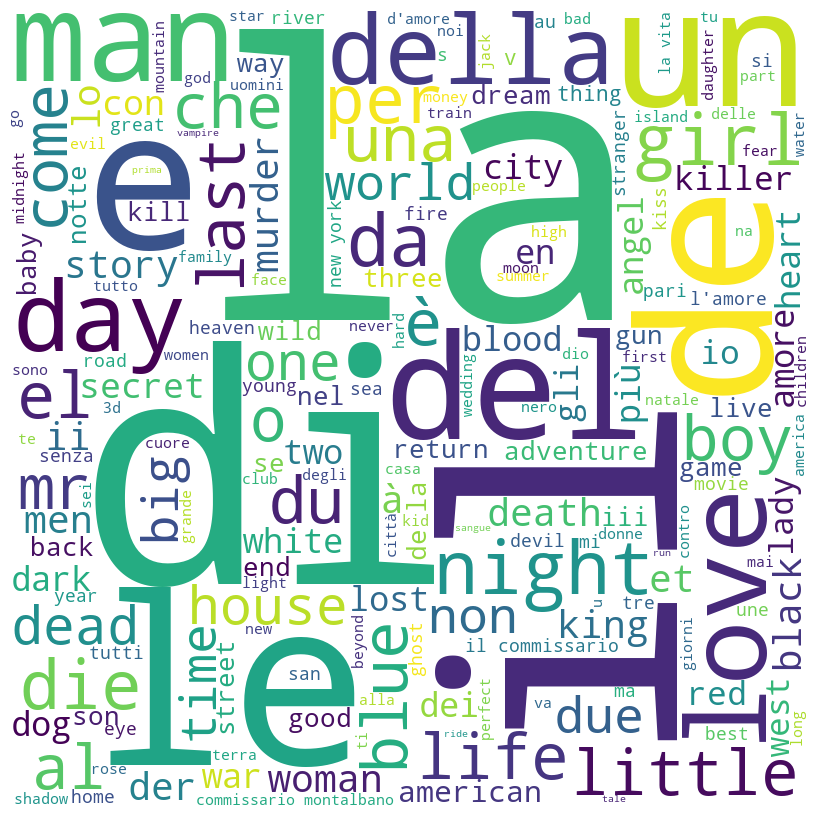

In [42]:
#wordcloud on title
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
for val in df.title:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()